Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
import io
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
df['MPG'].value_counts().idxmax()

'bad'

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
for discrete_valued_attribute in ['cylinders','weight']:
    for attribute_value in df[discrete_valued_attribute].unique():
        splitY = df[df[discrete_valued_attribute]==attribute_value]
        splitN = df[df[discrete_valued_attribute]!=attribute_value]
        goodY = splitY['MPG'].value_counts()['good'] if 'good' in splitY['MPG'].value_counts() else 0
        badY = splitY['MPG'].value_counts()['bad'] if 'bad' in splitY['MPG'].value_counts() else 0
        goodN = splitN['MPG'].value_counts()['good'] if 'good' in splitN['MPG'].value_counts() else 0
        badN = splitN['MPG'].value_counts()['bad'] if 'bad' in splitN['MPG'].value_counts() else 0
        print(discrete_valued_attribute,attribute_value,goodY,badY,goodN,badN,InformationGain(goodY,badY,goodN,badN))

cylinders 4 5 4 0 11 0.3652938975319328
cylinders 6 0 6 5 9 0.15307795338969116
cylinders 8 0 5 5 10 0.1225562489182657
weight light 3 3 2 12 0.09710717945150363
weight medium 2 6 3 9 0.0
weight weighty 0 6 5 9 0.15307795338969116


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [6]:
# either of these is acceptable
def get_midpoints(df,real_valued_attribute):
    df2 = df.sort_values(by=real_valued_attribute)
    all_possible_midpoints = (df2[real_valued_attribute]+df2[real_valued_attribute].shift())[1:]/2.0
    flags = (df2['MPG'] != df2['MPG'].shift())[1:]
    return all_possible_midpoints[flags]

def easy_get_midpoints(df,real_valued_attribute):
    df2 = df.sort_values(by=real_valued_attribute)
    return (df2[real_valued_attribute]+df2[real_valued_attribute].shift())[1:]/2.0

In [7]:
for real_valued_attribute in ['HP']:
    for attribute_value in get_midpoints(df,real_valued_attribute):
        splitY = df[df[real_valued_attribute]>attribute_value]
        splitN = df[df[real_valued_attribute]<=attribute_value]
        goodY = splitY['MPG'].value_counts()['good'] if 'good' in splitY['MPG'].value_counts() else 0
        badY = splitY['MPG'].value_counts()['bad'] if 'bad' in splitY['MPG'].value_counts() else 0
        goodN = splitN['MPG'].value_counts()['good'] if 'good' in splitN['MPG'].value_counts() else 0
        badN = splitN['MPG'].value_counts()['bad'] if 'bad' in splitN['MPG'].value_counts() else 0
        print(real_valued_attribute,attribute_value,goodY,badY,goodN,badN,InformationGain(goodY,badY,goodN,badN))

HP 83.0 2 15 3 0 0.36710265610273324
HP 87.0 2 14 3 1 0.21417094500762923
HP 89.5 1 14 4 1 0.36577659947122626
HP 91.0 1 13 4 2 0.2759267455941731
HP 92.5 0 13 5 2 0.5091859254608121


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Optimal split: HP > 92.5

13 cars with HP > 92.5: all 13 have "bad" MPG, no need for further partitioning

7 cars with HP <= 92.5: 5 have "good" MPG and 2 have "bad" MPG, so must partition further

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [8]:
splitN = df[df['HP']<=92.5]
splitN['MPG'].value_counts().idxmax()

'good'

In [9]:
for discrete_valued_attribute in ['cylinders','weight']:
    for attribute_value in splitN[discrete_valued_attribute].unique():
        splitNY = splitN[splitN[discrete_valued_attribute]==attribute_value]
        splitNN = splitN[splitN[discrete_valued_attribute]!=attribute_value]
        goodNY = splitNY['MPG'].value_counts()['good'] if 'good' in splitNY['MPG'].value_counts() else 0
        badNY = splitNY['MPG'].value_counts()['bad'] if 'bad' in splitNY['MPG'].value_counts() else 0
        goodNN = splitNN['MPG'].value_counts()['good'] if 'good' in splitNN['MPG'].value_counts() else 0
        badNN = splitNN['MPG'].value_counts()['bad'] if 'bad' in splitNN['MPG'].value_counts() else 0
        print(discrete_valued_attribute,attribute_value,goodNY,badNY,goodNN,badNN,InformationGain(goodNY,badNY,goodNN,badNN))
        
for real_valued_attribute in ['HP']:
    for attribute_value in get_midpoints(splitN,real_valued_attribute):
        splitNY = splitN[splitN[real_valued_attribute]>attribute_value]
        splitNN = splitN[splitN[real_valued_attribute]<=attribute_value]
        goodNY = splitNY['MPG'].value_counts()['good'] if 'good' in splitNY['MPG'].value_counts() else 0
        badNY = splitNY['MPG'].value_counts()['bad'] if 'bad' in splitNY['MPG'].value_counts() else 0
        goodNN = splitNN['MPG'].value_counts()['good'] if 'good' in splitNN['MPG'].value_counts() else 0
        badNN = splitNN['MPG'].value_counts()['bad'] if 'bad' in splitNN['MPG'].value_counts() else 0
        print(real_valued_attribute,attribute_value,goodNY,badNY,goodNN,badNN,InformationGain(goodNY,badNY,goodNN,badNN))

cylinders 4 5 0 0 2 0.8631205685666309
cylinders 6 0 2 5 0 0.8631205685666309
weight light 3 0 2 2 0.2916919971380595
weight medium 2 2 3 0 0.2916919971380595
HP 83.0 2 2 3 0 0.2916919971380595
HP 87.0 2 1 3 1 0.005977711423773854
HP 89.5 1 1 4 1 0.06174335793280074
HP 91.0 1 0 4 2 0.07600985366278287


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Final tree:
(HP > 92.5)?

    Y: predict bad

    N: (cylinders = 4)?

        Y: predict good

        N: predict bad

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

bad,4,95,light

bad,6,113,medium

good,4,83,weighty

bad,6,70,weighty


### Question 3, Predicting burden of disease （40 pts)

In [10]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

accuracy = []
for i in range(1,11):    
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_predict = dt.predict(X_test)
    accuracy.append((y_predict == y_test).value_counts(normalize=True)[True])
accuracy

[0.3333333333333333,
 0.6153846153846154,
 0.6410256410256411,
 0.6666666666666666,
 0.6666666666666666,
 0.6410256410256411,
 0.6153846153846154,
 0.6410256410256411,
 0.6410256410256411,
 0.6153846153846154]

b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

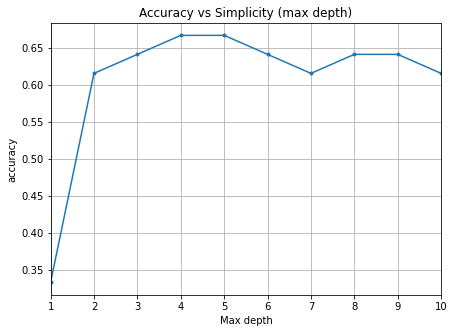

In [12]:
import matplotlib.pylab as plt
plt.figure(figsize=(7,5))
plt.plot(range(1,11,1), accuracy, '.-')
plt.xlabel("Max depth")
plt.ylabel("accuracy")
plt.title("Accuracy vs Simplicity (max depth)")
plt.xlim(1,10)
plt.grid(True)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid ={'max_depth':range(1,11)}
dt = DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,cv=5)
rs=gr.fit(X_train,y_train)
print('Best parameter value:',rs.best_params_)
y_predict = rs.predict(X_test)
print('Accuracy = ',((y_predict == y_test).value_counts(normalize=True)[True]))

Best parameter value: {'max_depth': 6}
Accuracy =  0.6666666666666666


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (10 pts)

In [14]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
from sklearn import tree
thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AdultLtrcyRate <= 0.856, samples = 91, value = [17, 25, 26, 23], class = low", fillcolor="#fcfeff"] ;
1 [label="GDPPCptaIntDol <= 1094.0, samples = 48, value = [17, 22, 1, 8], class = high", fillcolor="#e1fbdf"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 9, value = [9, 0, 0, 0], class = awful", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="ExtResHlthPctTotExpHlth <= 0.005, samples = 39, value = [8, 22, 1, 8], class = high", fillcolor="#acf3a6"] ;
1 -> 3 ;
4 [label="samples = 6, value = [0, 0, 0, 6], class = medium", fillcolor="#d739e5"] ;
3 -> 4 ;
5 [label="samples = 33, value = [8, 22, 1, 2], class = high", fillcolor="#98f090"] ;
3 -> 5 ;
6 [label="SustAccImprSanUrb <= 0.842, samples = 43, value = [0, 3, 25, 15], class = low", fillcolor="#b8dcf6"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
7 [lab

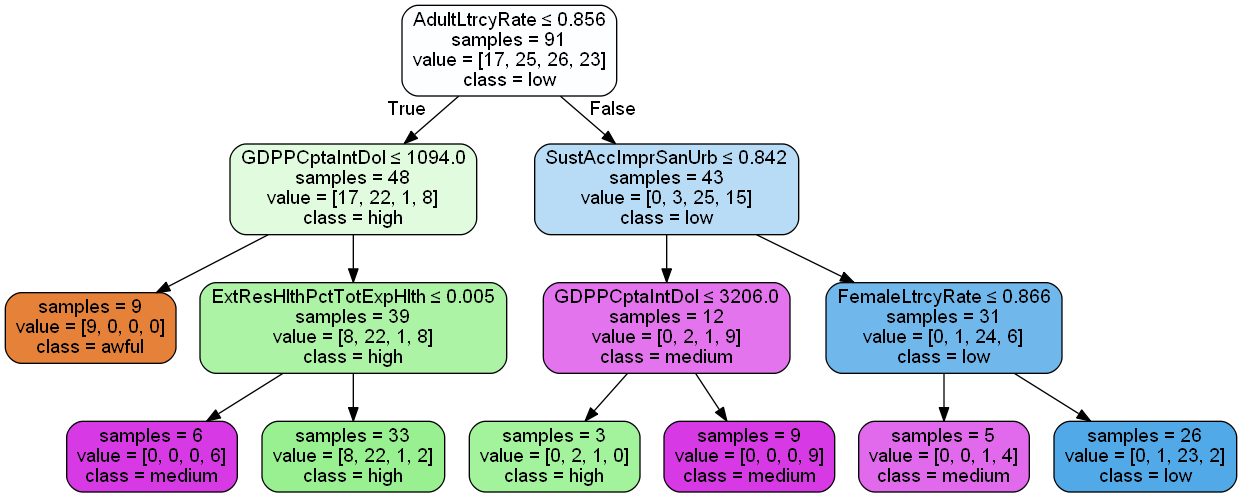

In [16]:
# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values,
                         class_names=['awful','high','low','medium'],       
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid ={'max_depth':range(1,11)}
rf = RandomForestClassifier(n_estimators=100)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train,y_train)
print('Best parameter value:',rs.best_params_)
y_predict = rs.predict(X_test)
print('Accuracy = ',((y_predict == y_test).value_counts(normalize=True)[True]))

Best parameter value: {'max_depth': 7}
Accuracy =  0.6666666666666666


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Random forests tend to have higher accuracy, but decision trees are more interpretable, both because they identify which variables are most important for prediction in general, as well as the sequence of rules that were applied to make any given prediction. 